![](https://images.pexels.com/photos/3771805/pexels-photo-3771805.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260)

# Raw IMU Data

Kevin J. Walcko, Phd

---

This is a check of the data to make sure there is nothing wrong with it. The goal is to see the expected **motion** in the plots.

In [1]:
from the_collector import BagIt, Pickle
import pandas as pd

In [14]:
!ls *.bag

still-x-down.pickle.bag  still-y-up.pickle.bag	  tumble.pickle.bag
still-x-up.pickle.bag	 still-z-down.pickle.bag
still-y-down.pickle.bag  still-z-up.pickle.bag


In [2]:
bag = BagIt(Pickle)

## Accelerometer Data

In [35]:
data = {}

for x in ["x-up", "x-down", "y-up", "y-down", "z-up", "z-down"]:
    d = bag.read(f"still-{x}.pickle.bag")
    index = d["accel"][0][1]
    d = [v+(ts-index,) for (v,ts) in d["accel"]]
    data[x] = d

>> Reading[pickle]: still-x-up.pickle.bag
>> Reading[pickle]: still-x-down.pickle.bag
>> Reading[pickle]: still-y-up.pickle.bag
>> Reading[pickle]: still-y-down.pickle.bag
>> Reading[pickle]: still-z-up.pickle.bag
>> Reading[pickle]: still-z-down.pickle.bag


In [36]:
dfs = {}
for key in data.keys():
    df = pd.DataFrame(data[key], columns=["x","y","z","time"])
    dfs[key] = df

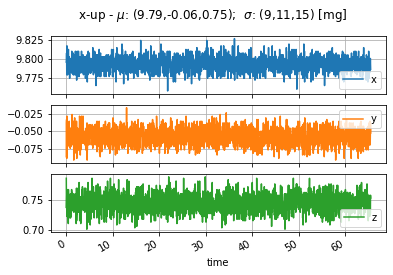

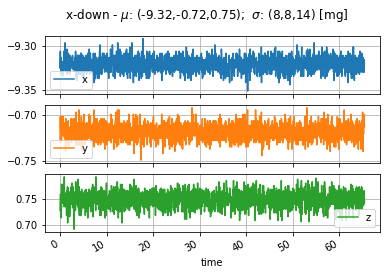

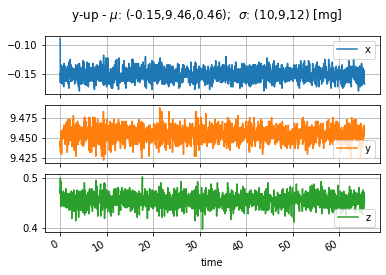

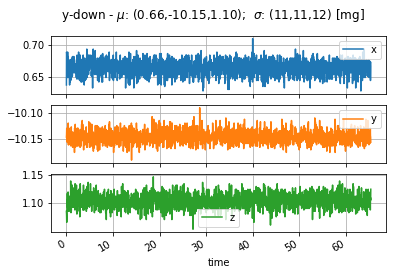

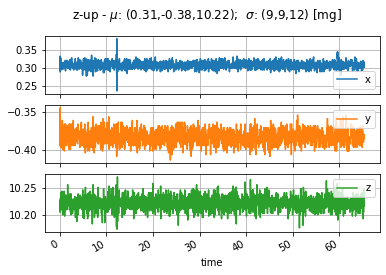

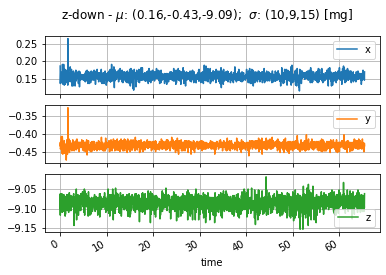

In [39]:
for key in dfs.keys():
    df = dfs[key]
    x,y,z,_ = df.mean()
    sx,sy,sz,_ = df.std()
    sx *= 1000
    sy *= 1000
    sz *= 1000
    df.plot(x="time", subplots=True, title=f"{key} - $\mu$: ({x:.2f},{y:.2f},{z:.2f});  $\sigma$: ({sx:.0f},{sy:.0f},{sz:.0f}) [mg]", grid=True)

## Magnetometer

In [40]:
d = bag.read("tumble.pickle.bag")
index = d["mag"][0][1]
d = [v+(ts-index,) for (v,ts) in d["mag"]]
mdf = pd.DataFrame(d, columns=["x","y","z","time"])

>> Reading[pickle]: tumble.pickle.bag


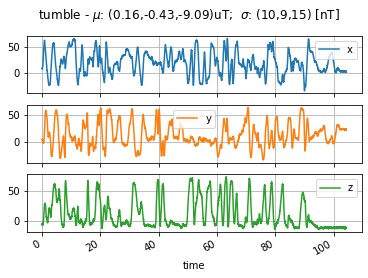

In [43]:
mdf.plot(x="time", subplots=True, title=f"tumble - $\mu$: ({x:.2f},{y:.2f},{z:.2f})uT;  $\sigma$: ({sx:.0f},{sy:.0f},{sz:.0f}) [nT]", grid=True);